In [65]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [67]:
df = pd.read_csv('../data/data_cleaned.csv')
df.head()

,id,gender,sleep_hours_weekday,sleep_quality,sport_hours_per_week,screentime_hours_per_day
0,1,0,8,3,6,0
1,2,1,7,6,13,0
2,3,0,5,5,6,11
3,4,1,7,7,5,3
4,5,1,7,6,4,3


In [68]:
show_missing_values(df)

,Column Name,Min,Max,n Unique,NaN count,NaN percentage,dtype
S. No.,,,,,,,
1,id,1,52,52,0,0.0%,int64
2,gender,0,2,3,0,0.0%,int64
3,sleep_hours_weekday,2,12,10,0,0.0%,int64
4,sleep_quality,0,10,11,0,0.0%,int64
5,sport_hours_per_week,0,30,13,0,0.0%,int64
6,screentime_hours_per_day,0,12,12,0,0.0%,int64


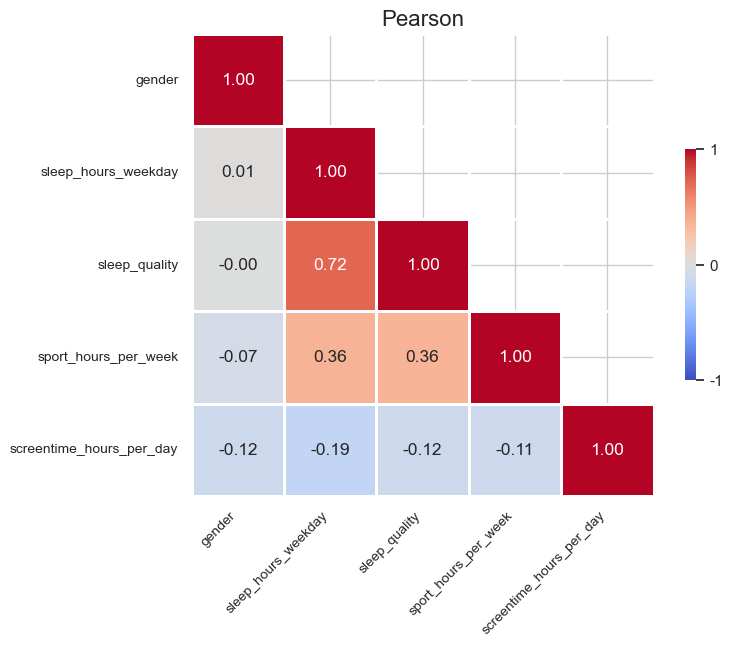

In [69]:
num_corr_heatmap(df.drop(columns='id').corr())

In [70]:
df.gender.value_counts(normalize=True)

gender
1    0.538462
0    0.442308
2    0.019231
Name: proportion, dtype: float64

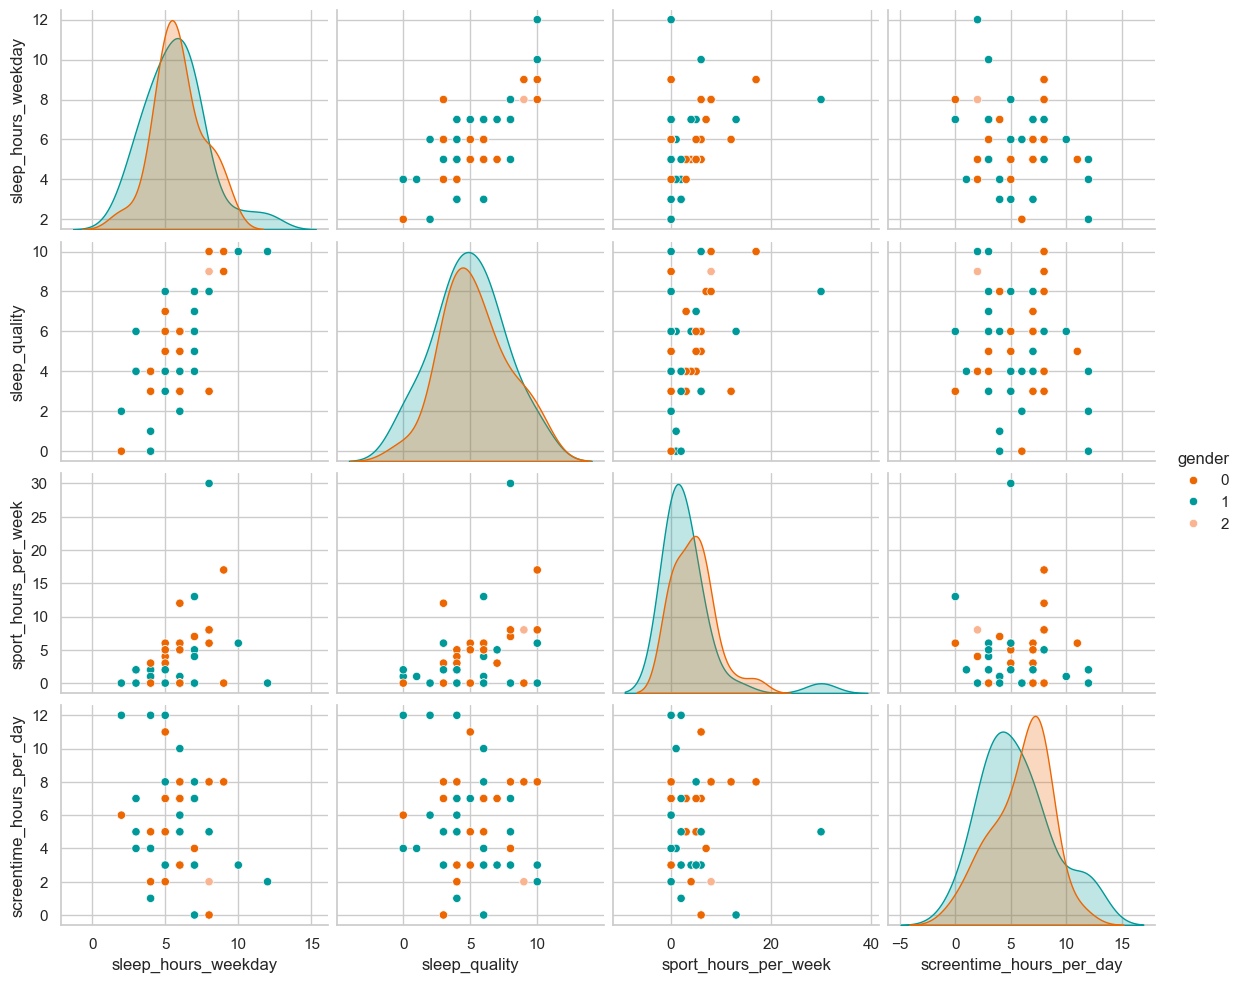

In [71]:
(sns
 .pairplot
    (df, 
     vars=[
        'sleep_hours_weekday',
        'sleep_quality',
        'sport_hours_per_week',
        'screentime_hours_per_day'
    ],
    hue='gender',
    height=2.5,
    aspect=1.2,
    palette=sns.color_palette([healthy_orange, siemens_petrol, healthy_orange_50])
    )
);

In [72]:
X = df.loc[df.gender.isin([0, 1]), ['sport_hours_per_week', 'screentime_hours_per_day', 'gender']]
y = df.loc[df.gender.isin([0, 1]), 'sleep_quality']
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          sleep_quality   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.218
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0984
Time:                        16:07:39   Log-Likelihood:                -116.18
No. Observations:                  51   AIC:                             240.4
Df Residuals:                      47   BIC:                             248.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

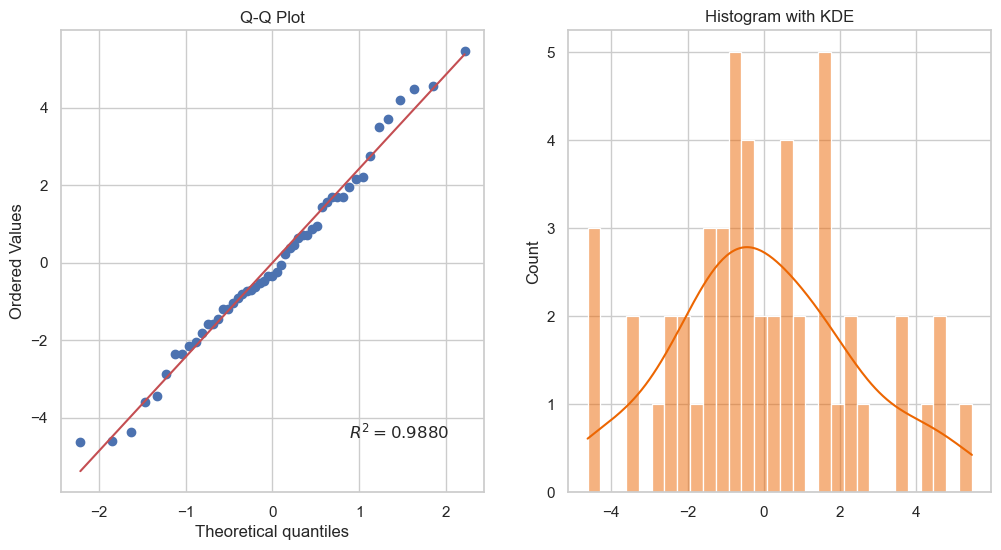

Shapiro-Wilk normality test: p-value = 0.690319616574171
D'Agostino's K^2 normality test: p-value = 0.8210598121438624
Kolmogorov-Smirnov normality test: p-value = 0.9470120264735019
Anderson-Darling normality test: statistic = 0.2289508463706582, critical value = 0.736


In [73]:
check_normality(model.resid)